<img src='bricks.jpg'>

## Import Statements


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('colors.csv')

In [3]:
data.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [4]:

data.count()

id          135
name        135
rgb         135
is_trans    135
dtype: int64

In [5]:
data.shape

(135, 4)

In [6]:
data.groupby('name').count()

,id,rgb,is_trans
name,,,
Aqua,1,1,1
Black,1,1,1
Blue,1,1,1
Blue-Violet,1,1,1
Bright Green,1,1,1
...,...,...,...
Violet,1,1,1
White,1,1,1
Yellow,1,1,1


In [7]:
#to find the total number of unique colors
data['name'].nunique()

135

In [8]:
#finding the number of transparent colors

# data.groupby('is_trans').count()

#or

data.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

##  Understanding Lego themes vs lego sets
<img src="lego_themes.png" >
<h4>vs</h4>
<img src="lego_sets.png">

In [9]:
data_sets = pd.read_csv("sets.csv")
data_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [10]:
#to find on which year were the first lego sets released and what were there sets called

min_year_id = data_sets['year'].idxmin()
print(data_sets['name'].loc[min_year_id])

Extra-Large Gift Set (ABB)


In [11]:
data_sets.sort_values('num_parts',ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [12]:
#to find How many different products did the LEGO company sell in their first year of operation
data_sets[data_sets['year']==1949]
# data_sets.index

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [13]:
#Now, let's create a new Series called sets_by_year which has the years as the index and the number of sets as the value.

sets_by_year = data_sets.groupby('year').count()
sets_by_year['num_parts'].head()
# sets_by_year.head(20)
# sets_by_year.index

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: num_parts, dtype: int64

In [14]:
sets_by_year.tail()

,set_num,name,theme_id,num_parts
year,,,,
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840
2020,674,674,674,674
2021,3,3,3,3


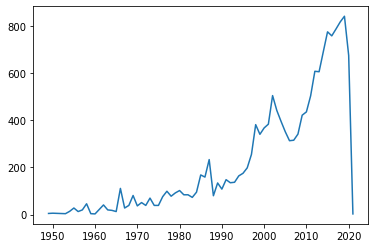

In [15]:
plt.plot(sets_by_year.index,sets_by_year['set_num'])
plt.show()

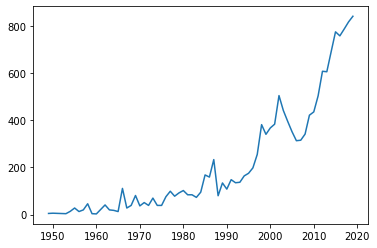

In [16]:
plt.plot(sets_by_year.index[:-2],sets_by_year['set_num'][:-2]) #slicing the last two rows to increase accuracy of plot

In [17]:
#can accomplish this by chaining the .groupby() and the .agg() functions together:

themes_by_year = data_sets.groupby('year').agg({'theme_id':pd.Series.nunique})
themes_by_year.rename(columns={"theme_id":'num_themeid'},inplace=True)
themes_by_year.head()

,num_themeid
year,
1949,2
1950,1
1953,2
1954,2
1955,4


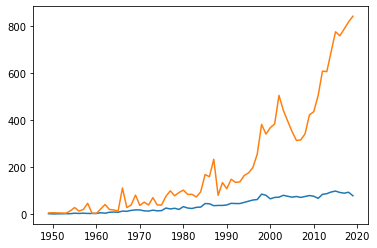

In [18]:
plt.plot(themes_by_year.index[:-2],themes_by_year.num_themeid[:-2])
plt.plot(sets_by_year.index[:-2],sets_by_year['set_num'][:-2])
# plt.show()

Text(0, 0.5, 'number of themes')

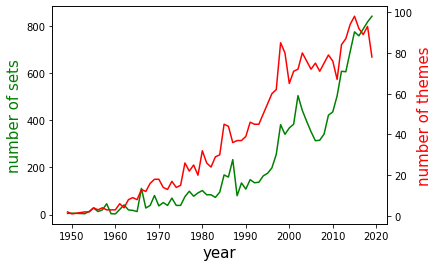

In [19]:
# two separate axis
#need to be able to configure and plot our data on two separate axes on the same chart. 
#This involves getting hold of an axis object from Matplotlib.

# We then create another axis object: ax2. The key thing is that by using the .twinx() method allows ax1 and 
#     ax2 to share the same x-axis. 
#     When we plot our data on the axes objects we get this:

ax1 = plt.gca()
ax2 = ax1.twinx()
# adding styling to separate colors of axis

ax1.set_xlabel("year",fontsize=15)

ax1.plot(sets_by_year.index[:-2],sets_by_year.set_num[:-2],color="green")
ax2.plot(themes_by_year.index[:-2],themes_by_year.num_themeid[:-2],color="red")

ax1.set_ylabel('number of sets',fontsize=15,color="green")
ax2.set_ylabel("number of themes",fontsize=15,color="red")


In [20]:
# Creating a Pandas Series called parts_per_set that has the year as the index and contains the average number of parts per 
# LEGO set in that year

parts_per_set = data_sets.groupby('year').agg({"num_parts":pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


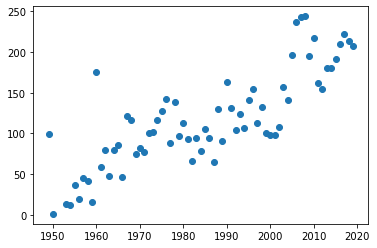

In [21]:
# creating scatter plot

plt.scatter(parts_per_set.index[:-2],parts_per_set.num_parts[:-2])

<img src="https://i.imgur.com/Sg4lcjx.png" >

In [23]:
# understaanding the themes.csv file
themes = pd.read_csv('themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [27]:
themes[themes.name=='Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [29]:
#checking which product corresponds to theme 18 in sets.csv file

data_sets[data_sets.theme_id==209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [36]:
# counting the no of sets per theme i can use the value_counts() method on our theme_id column

set_theme_count = data_sets["theme_id"].value_counts()
set_theme_count

158    753
501    656
494    398
435    356
503    329
      ... 
210      1
455      1
383      1
245      1
519      1
Name: theme_id, Length: 571, dtype: int64

In [31]:
# giving names to above columns inorder to merge 

set_theme_count = pd.DataFrame({"id":set_theme_count.index,"set_count":set_theme_count.values})
set_theme_count.head()


,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [32]:
# merging dataframes themes and sets

merge_df_s_t = pd.merge(set_theme_count,themes,on='id')
merge_df_s_t.head()


,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

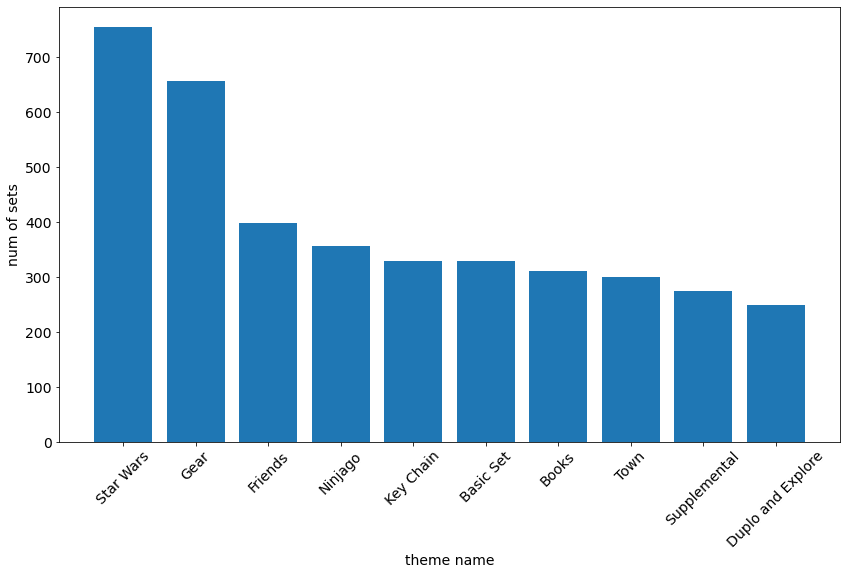

In [40]:
#plotting a bar graph
plt.figure(figsize=(14,8))
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('theme name',fontsize=14)
plt.ylabel('num of sets',fontsize=14)
plt.bar(merge_df_s_t.name[:10],merge_df_s_t.set_count[:10])